# Introduction to `keras`

Solve three problems:

- Regression
- Binary Classification
- Multi-class Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from sklearn.datasets import make_regression, make_classification, load_boston, load_breast_cancer, load_iris

Using TensorFlow backend.


In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X, y = make_regression(n_features = 20)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

### Basic Approach to Building Network with `Sequential`

1. Determine network topology
2. Determine how model will compile
3. Fit Model

In [8]:
from keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
from keras.layers import Dense

In [11]:
model.add(Dense(64, input_shape = (X.shape[1], ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'mse', optimizer='adam', metrics = ['mae'])

In [14]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
         epochs = 150, verbose = 0)

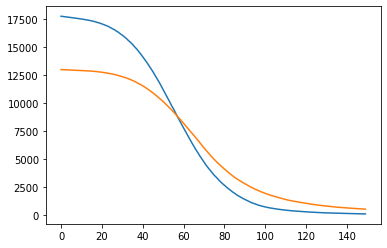

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

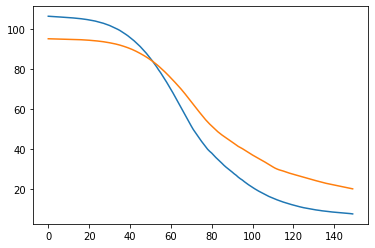

In [16]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [17]:
lr = LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
preds = lr.predict(X_test_scaled)

In [21]:
mae = mean_absolute_error(y_test, preds)

In [22]:
mae

1.766409241099609e-13

In [23]:
ann_preds = model.predict(X_test_scaled)

In [24]:
mae_ann = mean_absolute_error(y_test, ann_preds)

In [25]:
mae_ann

20.127822052232265

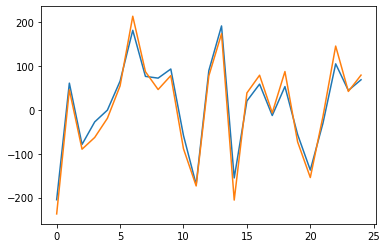

In [26]:
plt.plot(ann_preds)
plt.plot(preds)

In [27]:
boston = load_boston()

In [28]:
X = boston.data
y = boston.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
sscale = StandardScaler()
X_train_scaled = sscale.fit_transform(X_train)
X_test_scaled = sscale.transform(X_test)

In [31]:
model = Sequential()
model.add(Dense(32, input_shape = (X.shape[1], ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

In [32]:
model.compile(loss = 'mse', optimizer='adam', metrics = ['mae'])

In [33]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
         epochs = 50)

Train on 379 samples, validate on 127 samples
Epoch 1/50
379/379 [==============================] - 0s 260us/step - loss: 600.2634 - mae: 22.7783 - val_loss: 568.5462 - val_mae: 22.0507
Epoch 2/50
379/379 [==============================] - 0s 27us/step - loss: 580.9471 - mae: 22.3155 - val_loss: 550.3124 - val_mae: 21.5981
Epoch 3/50
379/379 [==============================] - 0s 26us/step - loss: 561.8200 - mae: 21.8552 - val_loss: 531.4674 - val_mae: 21.1281
Epoch 4/50
379/379 [==============================] - 0s 27us/step - loss: 540.1617 - mae: 21.3252 - val_loss: 508.8608 - val_mae: 20.5602
Epoch 5/50
379/379 [==============================] - 0s 28us/step - loss: 513.7671 - mae: 20.6722 - val_loss: 480.1433 - val_mae: 19.8311
Epoch 6/50
379/379 [==============================] - 0s 27us/step - loss: 478.8249 - mae: 19.8261 - val_loss: 443.4692 - val_mae: 18.8725
Epoch 7/50
379/379 [==============================] - 0s 27us/step - loss: 435.2155 - mae: 18.6889 - val_loss: 394.6565

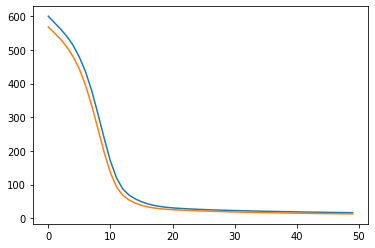

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

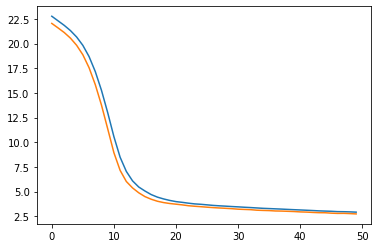

In [35]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [36]:
cancer = load_breast_cancer()

In [37]:
X = cancer.data
y = cancer.target

In [38]:
model = Sequential()

In [39]:
model.add(Dense(32, input_shape = (X.shape[1], ), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',
             metrics = ['accuracy'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [42]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
         epochs = 100, verbose = 0)

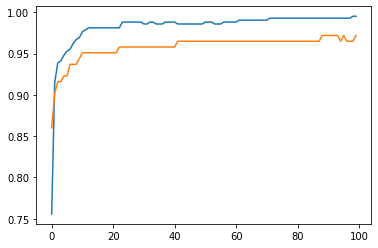

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

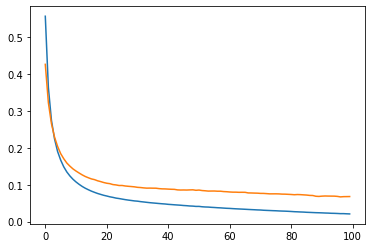

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
lgr = LogisticRegression()
lgr.fit(X_train_scaled, y_train)
preds = lgr.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, preds)

0.965034965034965

In [51]:
ann_preds = model.predict(X_test_scaled)

In [57]:
ann_preds = np.where(ann_preds > 0.5, 1, 0)

In [58]:
accuracy_score(y_test, ann_preds)

0.972027972027972

##### Multi-class

In [59]:
iris = load_iris()

In [60]:
X = iris.data
y = iris.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [62]:
model = Sequential()

In [63]:
model.add(Dense(32, input_shape = (X.shape[1], ), activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics = ['accuracy'])

In [66]:
y_train.shape

(112,)

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [70]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test),
                   epochs = 100, verbose = 0)

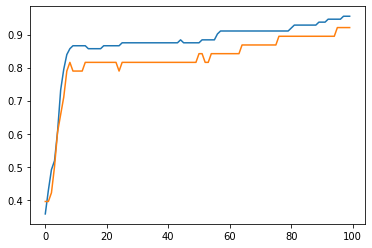

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

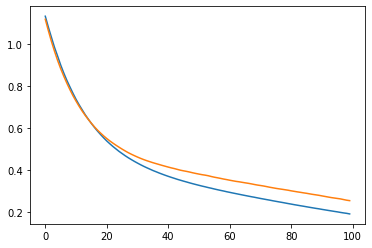

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])